# importing modules

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from os import path

In [2]:
pwd


'/Users/shreetamakarmakar/code/omdena_mum_aqi/omdena-mumbai-chapter-air-quality/src/tasks/task-2-eda'

In [3]:
data_path = '/Users/shreetamakarmakar/code/omdena_mum_aqi/omdena-mumbai-chapter-air-quality/src/data/semi_cleaned_files'

In [13]:
sorted(os.listdir(data_path))

['BandraKurlaComplexMumbaiIITM.csv',
 'BandraMumbaiMPCB.csv',
 'BorivaliEastMumbaiIITM.csv',
 'BorivaliEastMumbaiMPCB.csv',
 'ChakalaAndheriEastMumbaiIITM.csv',
 'ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv',
 'ColabaMumbaiMPCB.csv',
 'DeonarMumbaiIITM.csv',
 'KandivaliEastMumbaiMPCB.csv',
 'KhindipadaBhandupWestMumbaiIITM.csv',
 'KurlaMumbaiMPCB.csv',
 'MaladWestMumbaiIITM.csv',
 'MazgaonMumbaiIITM.csv',
 'MulundWestMumbaiMPCB.csv',
 'NavyNagarColabaMumbaiIITM.csv',
 'PowaiMumbaiMPCB.csv',
 'SiddharthNagarWorliMumbaiIITM.csv',
 'SionMumbaiMPCB.csv',
 'VasaiWestMumbaiMPCB.csv',
 'VileParleWestMumbaiMPCB.csv',
 'WorliMumbaiMPCB.csv']

In [18]:
data_list =  [pd.read_csv(f'{data_path}/{fl}') for fl in sorted(os.listdir(data_path))[7:14]]
fname_list = [fl[:-4] for fl in sorted(os.listdir(data_path))[7:14]]
data_dict = dict(zip(fname_list, data_list))

In [19]:
data_dict.keys()

dict_keys(['DeonarMumbaiIITM', 'KandivaliEastMumbaiMPCB', 'KhindipadaBhandupWestMumbaiIITM', 'KurlaMumbaiMPCB', 'MaladWestMumbaiIITM', 'MazgaonMumbaiIITM', 'MulundWestMumbaiMPCB'])

# Column field explanation

data_dictionary = {'From Date': 'Start Date', 

 'To Date': 'End Date',
 
 'PM2.5': 'Particulate Matter less than 2.5 micron size',
 
 'PM10': 'Particulate Matter less than 10 Micron size',
 
 'NO': 'Nitric Oxide',
 
 'NO2': 'Nitrogen dioxide',
 
 'NOx': 'Oxides of Nitrogen',
 
 'NH3': 'Ammonia',
 
 'SO2': 'Sulphur Dioxide',
 
 'CO': 'Carbon Monoxide',
 
 'Ozone': 'Ozone',
 
 'Benzene': 'Benzen',
 
 'Toluene': 'Toluene',
 
 'Eth-Benzene': 'Ethyl Benzene',
 
 'MP-Xylene': 'M+P Xylene',
 
 'RH': 'Relative Humidity',
 
 'WS': 'Wind Speed',
 
 'WD': 'Wind Direcction',
 
 'SR': 'Solar Radiation',
 
 'BP': 'Barometric Pressure',
 
 'Xylene': 'Xylene',
 
 'AT': 'Ambient Temperature',
 
 'RF': 'Rain Fall',
 
 'TOT-RF': 'TOT-RF',
 
 'Temp': 'Rack Temperature',
 
 'VWS': 'Vertical Wind Speed'}

# Checking station-by-station for missing values

In [171]:
deonar = data_dict['DeonarMumbaiIITM']
kandi_east = data_dict['KandivaliEastMumbaiMPCB']
kbhandup_west = data_dict['KhindipadaBhandupWestMumbaiIITM']
kurla = data_dict['KurlaMumbaiMPCB']
malad_west = data_dict['MaladWestMumbaiIITM']
mazgaon = data_dict['MazgaonMumbaiIITM']
mulund = data_dict['MulundWestMumbaiMPCB']

In [172]:
# cleaning dataframe columns 
def clean_columns(df):
    df = df.drop('Unnamed: 0', axis = 1)
    rename_cols = [c.lower().replace('.', '_').replace(' ', '_').replace('-', '_') for c in df.columns]
    col_dict = dict(zip(df.columns.tolist(), rename_cols))
    df = df.rename(columns = col_dict)
    return df

def missing_val(df):
    return df.isnull().sum().to_frame().reset_index().rename(columns = {'index': 'col_names', 0: 'sum_missing'})

In [173]:
deonar = clean_columns(deonar)
kandi_east = clean_columns(kandi_east)
kbhandup_west = clean_columns(kbhandup_west)
kurla = clean_columns(kurla)
malad_west = clean_columns(malad_west)
mazgaon = clean_columns(mazgaon)
mulund = clean_columns(mulund)

In [174]:
kandi_missing = missing_val(kandi_east)
deonar_missing = missing_val(deonar)
kbhandup_west_missing = missing_val(kbhandup_west)
kurla_missing = missing_val(kurla)
malad_west_missing = missing_val(malad_west)
mazgaon_missing = missing_val(mazgaon)
mulund_missing = missing_val(mulund)

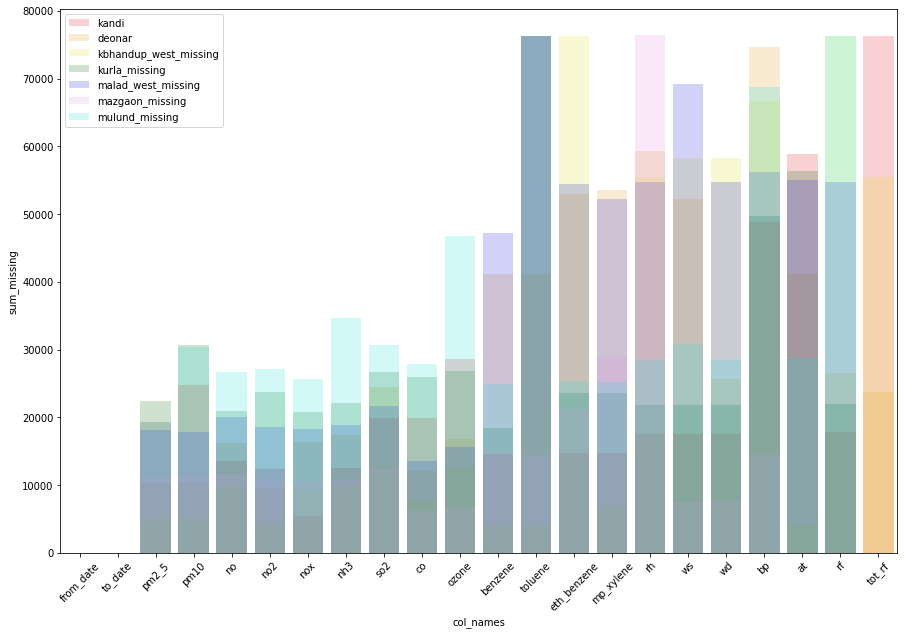

In [178]:
plt.figure(figsize = (15, 10))
sns.barplot(data = kandi_missing, x = 'col_names', y = 'sum_missing', color = 'r', alpha = 0.2, label = 'kandi')
sns.barplot(data = deonar_missing, x = 'col_names', y = 'sum_missing', color = 'orange', alpha = 0.2, label = 'deonar')
sns.barplot(data = kbhandup_west_missing, x = 'col_names', y = 'sum_missing', color = 'yellow', alpha = 0.2, label = 'kbhandup_west_missing')
sns.barplot(data = kurla_missing, x = 'col_names', y = 'sum_missing', color = 'green', alpha = 0.2, label = 'kurla_missing')
sns.barplot(data = malad_west_missing, x = 'col_names', y = 'sum_missing', color = 'blue', alpha = 0.2, label = 'malad_west_missing')
sns.barplot(data = mazgaon_missing, x = 'col_names', y = 'sum_missing', color = 'violet', alpha = 0.2, label = 'mazgaon_missing')
sns.barplot(data = mulund_missing, x = 'col_names', y = 'sum_missing', color = 'cyan', alpha = 0.2, label = 'mulund_missing')

plt.xticks(rotation = 45)
plt.legend()
plt.show()

# sns.barplot()

In [194]:


fig = px.bar(
    data_frame=deonar_missing,
    x="col_names",
    y="sum_missing", 
    title='deonar',
    
)
fig.update_traces(marker_color='blue')
fig = px.bar(
    data_frame=mulund_missing,
    x="col_names",
    y="sum_missing"
)
# fig.legend()
fig.update_traces(marker_color='green')
fig.show()

NameError: name 'data_frame_names' is not defined

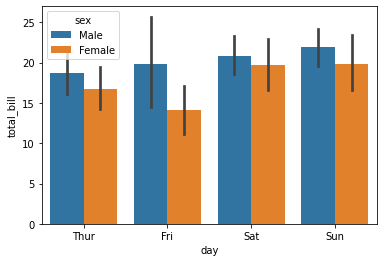

In [121]:
deonar.columns

Index(['from_date', 'to_date', 'pm2_5', 'pm10', 'no', 'no2', 'nox', 'nh3',
       'so2', 'co', 'ozone', 'benzene', 'toluene', 'eth_benzene', 'mp_xylene',
       'rh', 'ws', 'wd', 'bp', 'xylene', 'at', 'rf', 'tot_rf'],
      dtype='object')

In [122]:
print(f'start date = {list(deonar.to_date)[0]}, end date = {list(deonar.to_date)[-1]}') 

start date = 2021-01-01 00:15:00, end date = 2023-07-03 00:00:00
